Welcome to our project! Having formulated the diagnosis of breast cancer as a data-driven problem, we will utilize machine learning concepts to predict if breast cancer is benign or malignant. Along the way, markdowns have been added to aid in your reading and understanding of our project.

# Data Extraction & Cleaning

## Import libraries and data

We first import some basic libraries as well as the data set. The library was sourced from kaggle, whereby features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Dataset link: https://www.kaggle.com/datasets/sahilnbajaj/cancer-classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
rawData = pd.read_csv('cancer_classification.csv')
rawData.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

## Extract columns of dataset

We look at the data type for each column to better understand what kind of data we are working with.

In [ ]:
# Find type of value of each column
print("Data types of each column:")
for column in rawData.columns:
    print(f"{column}: {rawData[column].dtype}")

Data types of each column:
mean radius: float64
mean texture: float64
mean perimeter: float64
mean area: float64
mean smoothness: float64
mean compactness: float64
mean concavity: float64
mean concave points: float64
mean symmetry: float64
mean fractal dimension: float64
radius error: float64
texture error: float64
perimeter error: float64
area error: float64
smoothness error: float64
compactness error: float64
concavity error: float64
concave points error: float64
symmetry error: float64
fractal dimension error: float64
worst radius: float64
worst texture: float64
worst perimeter: float64
worst area: float64
worst smoothness: float64
worst compactness: float64
worst concavity: float64
worst concave points: float64
worst symmetry: float64
worst fractal dimension: float64
benign_0__mal_1: int64


We convert all data to a pandas dataFrame.

In [ ]:
# Convert all data to DataFrame
pdData = pd.DataFrame(rawData)
pdData.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  benign_0__mal_1  
0          0.4601                  0.11890                0  
1          0.2750                  0.08902                0  
2          0.3613                  0.08758                0  
3          0.6638                  0.17300                0  
4          0.2364                  0.07678                0  

[5 rows x 31 columns]

## Filter data and remove redundant columns

There contains 3 distinct types of data in the dataset, mean data, worst data and error. For the purpose of our project, we decided that only mean and worst data are relevant as they represent the aver. Hence data columns representing error was removed. 

In [ ]:
# List of columns to delete
columns_to_delete = ['radius error', 'texture error', 'perimeter error', 'area error', 
                     'smoothness error', 'compactness error', 'concavity error', 
                     'concave points error', 'symmetry error', 'fractal dimension error']

# Drop the specified columns
pdData.drop(columns=columns_to_delete, inplace=True)

# Check the resulting DataFrame
print(pdData.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Clean Data

Now we move on to clean our data. First we looked at the skewness and kurtosis of the data.

Skewness is a measure of symmetry of the data set. A data set is symmetric if it looks the same to the left and right of the center point. Ideally, skewness should be as close to 0 as possible.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. A positive value for the kurtosis indicates a distribution more peaked than normal. In contrast, a negative kurtosis indicates a shape flatter than normal. Ideally, kurtosis should also be as close to 0 as possible.

In [ ]:
# Calculate skewness
skewness = pdData.skew()
print("Skewness:")
print(skewness)

# Calculate kurtosis
kurtosis = pdData.kurt()
print("\nKurtosis:")
print(kurtosis)

Skewness:
mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0.492616
worst symmetry             1.433928
worst fractal dimension    1.662579
benign_0__mal_1           -0.528461
dtype: float64

Kurtosis:
mean radius                0.845522
mean texture               0.758319
mean perimeter             0.972214
mean area                  3.652303
mean smoothness            0.855975
mean compactness           1

We can ignore benign_0__mal_1 in cleaning the data as it is a binary value that simply indicates if the current sample is benign or malignant.

From the quick overview above, we can see that a few columns have relatively high skewness (>1) and kurtosis (>3).

### Normalise Data Using Log Scale

To address skewness of the data, we first normalised the data using a log scale.

In [ ]:
# Make a copy of the DataFrame
pdData_log = pdData.copy()

# Exclude 'benign_0__mal_1' from log transformation
columns_to_log = pdData.columns[pdData.columns != 'benign_0__mal_1']

# Apply log transformation with a small constant to selected columns using .loc
pdData_log.loc[:, columns_to_log] = np.log(pdData_log.loc[:, columns_to_log] + 1)

print(pdData_log.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     2.943913      2.431857        4.818667   6.909753         0.111899   
1     3.071303      2.932260        4.897093   7.190676         0.081340   
2     3.029650      3.102342        4.875197   7.093405         0.104000   
3     2.519308      3.062456        4.364117   5.958683         0.133219   
4     3.058237      2.730464        4.913390   7.168580         0.095583   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.244983        0.262441             0.137237       0.216642   
1          0.075701        0.083330             0.067818       0.166531   
2          0.148334        0.180153             0.120357       0.188055   
3          0.249902        0.216240             0.100026       0.230874   
4          0.124692        0.180653             0.099212       0.166277   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Remove Outliers with IRQ

To address the high kurtosis, we further cleaned the data by removing outliers through IRQ.

Outliers are typically defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [ ]:
# Outlier Removal using IQR
def remove_outliers_iqr(df):
    # Exclude 'benign_0__mal_1' from outlier removal
    columns_to_filter = df.columns[df.columns != 'benign_0__mal_1']
    
    Q1 = df[columns_to_filter].quantile(0.25)
    Q3 = df[columns_to_filter].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows based on outlier bounds for selected columns
    df_filtered = df[((df[columns_to_filter] >= lower_bound) & (df[columns_to_filter] <= upper_bound)).all(axis=1)]
    
    return df_filtered

# Remove outliers using the defined function
pdData_irq = remove_outliers_iqr(pdData_log)

print(pdData_irq.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
1     3.071303      2.932260        4.897093   7.190676         0.081340   
2     3.029650      3.102342        4.875197   7.093405         0.104000   
4     3.058237      2.730464        4.913390   7.168580         0.095583   
6     2.957511      3.043570        4.792479   6.947937         0.090416   
7     2.688528      3.083285        4.513055   6.361130         0.112346   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
1          0.075701        0.083330             0.067818       0.166531   
2          0.148334        0.180153             0.120357       0.188055   
4          0.124692        0.180653             0.099212       0.166277   
6          0.103459        0.106789             0.071390       0.165006   
7          0.152292        0.089530             0.058127       0.198523   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
1             

## Final Data

Now that our data is cleaned, we save it as cleaned_data for use further on in the project.

In [ ]:
cleaned_data = pdData_irq

In [ ]:
print(cleaned_data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
1     3.071303      2.932260        4.897093   7.190676         0.081340   
2     3.029650      3.102342        4.875197   7.093405         0.104000   
4     3.058237      2.730464        4.913390   7.168580         0.095583   
6     2.957511      3.043570        4.792479   6.947937         0.090416   
7     2.688528      3.083285        4.513055   6.361130         0.112346   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
1          0.075701        0.083330             0.067818       0.166531   
2          0.148334        0.180153             0.120357       0.188055   
4          0.124692        0.180653             0.099212       0.166277   
6          0.103459        0.106789             0.071390       0.165006   
7          0.152292        0.089530             0.058127       0.198523   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
1             

We can check on the skewness and kurtosis values again and can see that they have improved significantly.

In [ ]:
# Calculate skewness
skewness = cleaned_data.skew()
print("Skewness:")
print(skewness)

# Calculate kurtosis
kurtosis = cleaned_data.kurt()
print("\nKurtosis:")
print(kurtosis)

Skewness:
mean radius                0.306655
mean texture               0.029947
mean perimeter             0.273437
mean area                  0.261968
mean smoothness            0.165209
mean compactness           0.655780
mean concavity             1.005411
mean concave points        0.970692
mean symmetry              0.111038
mean fractal dimension     0.523212
worst radius               0.537326
worst texture             -0.135130
worst perimeter            0.479810
worst area                 0.497892
worst smoothness           0.136378
worst compactness          0.632985
worst concavity            0.458288
worst concave points       0.366773
worst symmetry             0.132122
worst fractal dimension    0.669450
benign_0__mal_1           -0.751502
dtype: float64

Kurtosis:
mean radius               -0.314141
mean texture              -0.267169
mean perimeter            -0.340658
mean area                 -0.301031
mean smoothness           -0.288180
mean compactness          -0

# Exploratory Data Analysis & Visualisation

## Data Description

We can use the describe function to get a quick overview of our data.

In [ ]:
cleaned_data.describe()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   496.000000    496.000000      496.000000  496.000000       496.000000   
mean      2.683471      2.977227        4.489345    6.349832         0.090287   
std       0.204440      0.202542        0.227813    0.444766         0.011366   
min       2.162288      2.461297        3.891412    5.144000         0.060634   
25%       2.544157      2.834830        4.334247    6.048375         0.081681   
50%       2.658159      2.975530        4.461992    6.296557         0.090060   
75%       2.800933      3.115513        4.632541    6.599221         0.098124   
max       3.199081      3.549905        5.050497    7.466228         0.125310   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        496.000000      496.000000           496.000000     496.000000   
mean           0.088864        0.069804             0.042031       0.162023   
std            0.036259        0.055580             0.031249       0.018725   
min            0.019195        0.000000             0.000000       0.110378   
25%            0.060177        0.026686             0.019057       0.148506   
50%            0.082091        0.052332             0.030277       0.161736   
75%            0.111318        0.102669             0.062400       0.175444   
max            0.205713        0.262595             0.145139       0.219858   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count              496.000000  ...     496.000000       496.000000   
mean                 0.059697  ...       3.244687         4.623726   
std                  0.005079  ...       0.223078         0.265121   
min                  0.048752  ...       2.601949         4.016203   
25%                  0.055806  ...       3.086943         4.444385   
50%                  0.059231  ...       3.263275         4.578467   
75%                  0.062820  ...       3.402446         4.778488   
max                  0.075469  ...       3.837515         5.358942   

       worst area  worst smoothness  worst compactness  worst concavity  \
count  496.000000        496.000000         496.000000       496.000000   
mean     6.592159          0.121792           0.197542         0.201844   
std      0.515673          0.018066           0.091794         0.126796   
min      5.414321          0.078118           0.033744         0.000000   
25%      6.248575          0.108518           0.130831         0.100886   
50%      6.497528          0.121775           0.182696         0.178272   
75%      6.890887          0.133394           0.258163         0.292838   
max      8.053251          0.174709           0.506215         0.572504   

       worst concave points  worst symmetry  worst fractal dimension  \
count            496.000000      496.000000               496.000000   
mean               0.098848        0.245613                 0.077236   
std                0.051858        0.035205                 0.011900   
min                0.000000        0.145398                 0.053579   
25%                0.060683        0.220300                 0.068301   
50%                0.087860        0.244004                 0.075460   
75%                0.138805        0.268327                 0.084580   
max                0.230556        0.345574                 0.115469   

       benign_0__mal_1  
count       496.000000  
mean          0.675403  
std           0.468697  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           1.000000  

[8 rows x 21 columns]

## Box Plot

We used boxplot to verify that we successfully removed the outliers in our data.

Before cleaning:

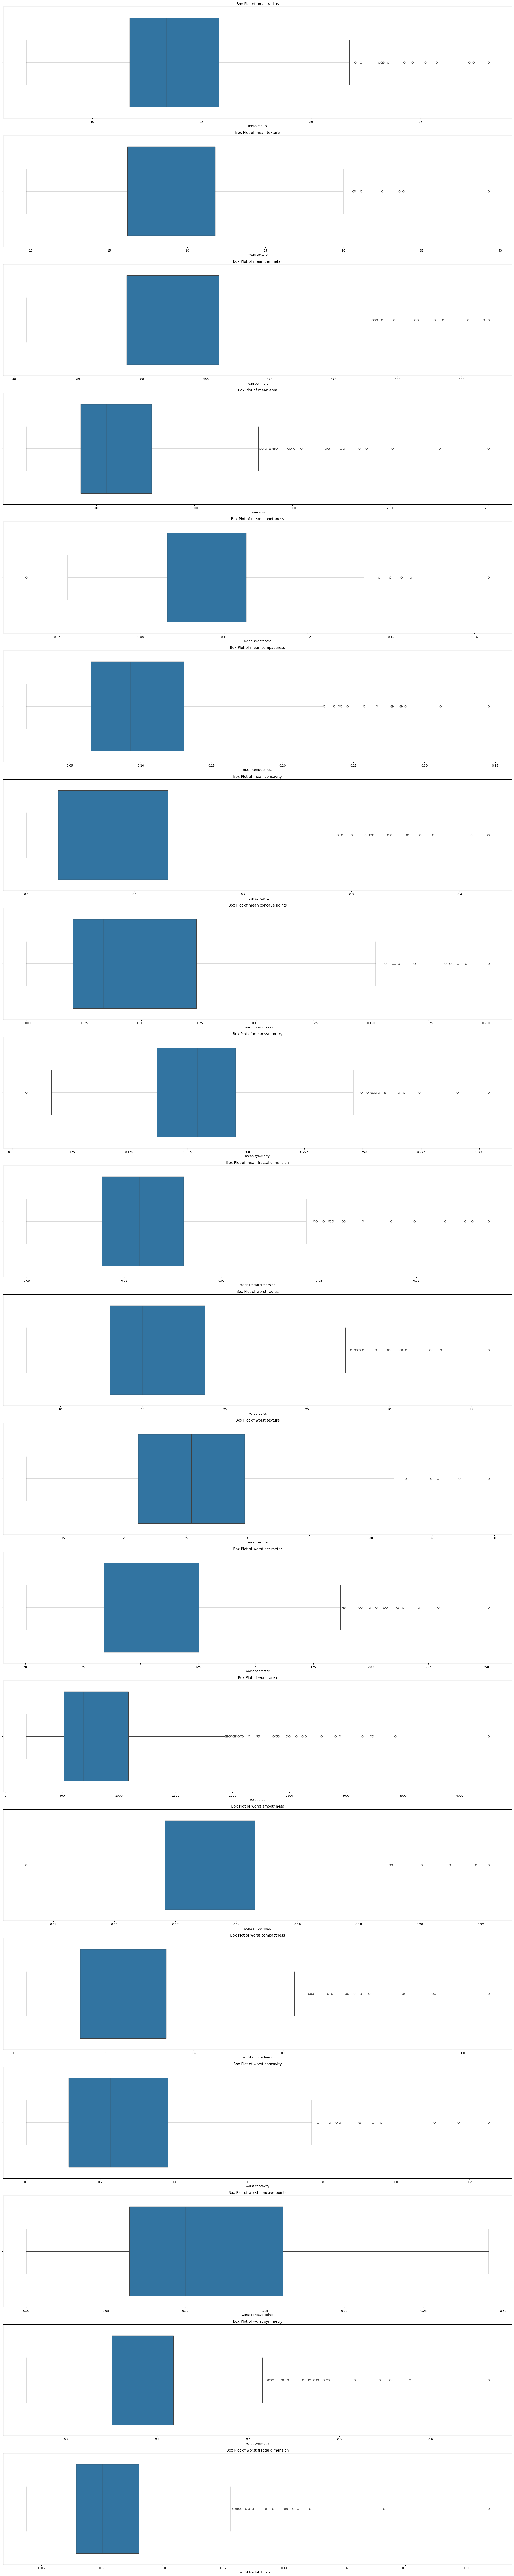

In [ ]:
# Set up the figure and axes with the desired figsize and adjust subplot heights
num_cols = len(pdData.columns) - 1
fig, axes = plt.subplots(num_cols, 1, figsize=(24, 6*num_cols), gridspec_kw={'height_ratios': [2]*num_cols})

# Get all column names except 'benign_0__mal_1'
columns_to_plot = [col for col in pdData.columns if col != 'benign_0__mal_1']

# Iterate over each variable to create the box plot
for i, variable in enumerate(columns_to_plot, 1):
    sb.boxplot(data=pdData[variable], orient='h', ax=axes[i-1])  # Use ax argument to specify subplot
    axes[i-1].set_title(f'Box Plot of {variable}')

plt.tight_layout()
plt.show()

After cleaning:

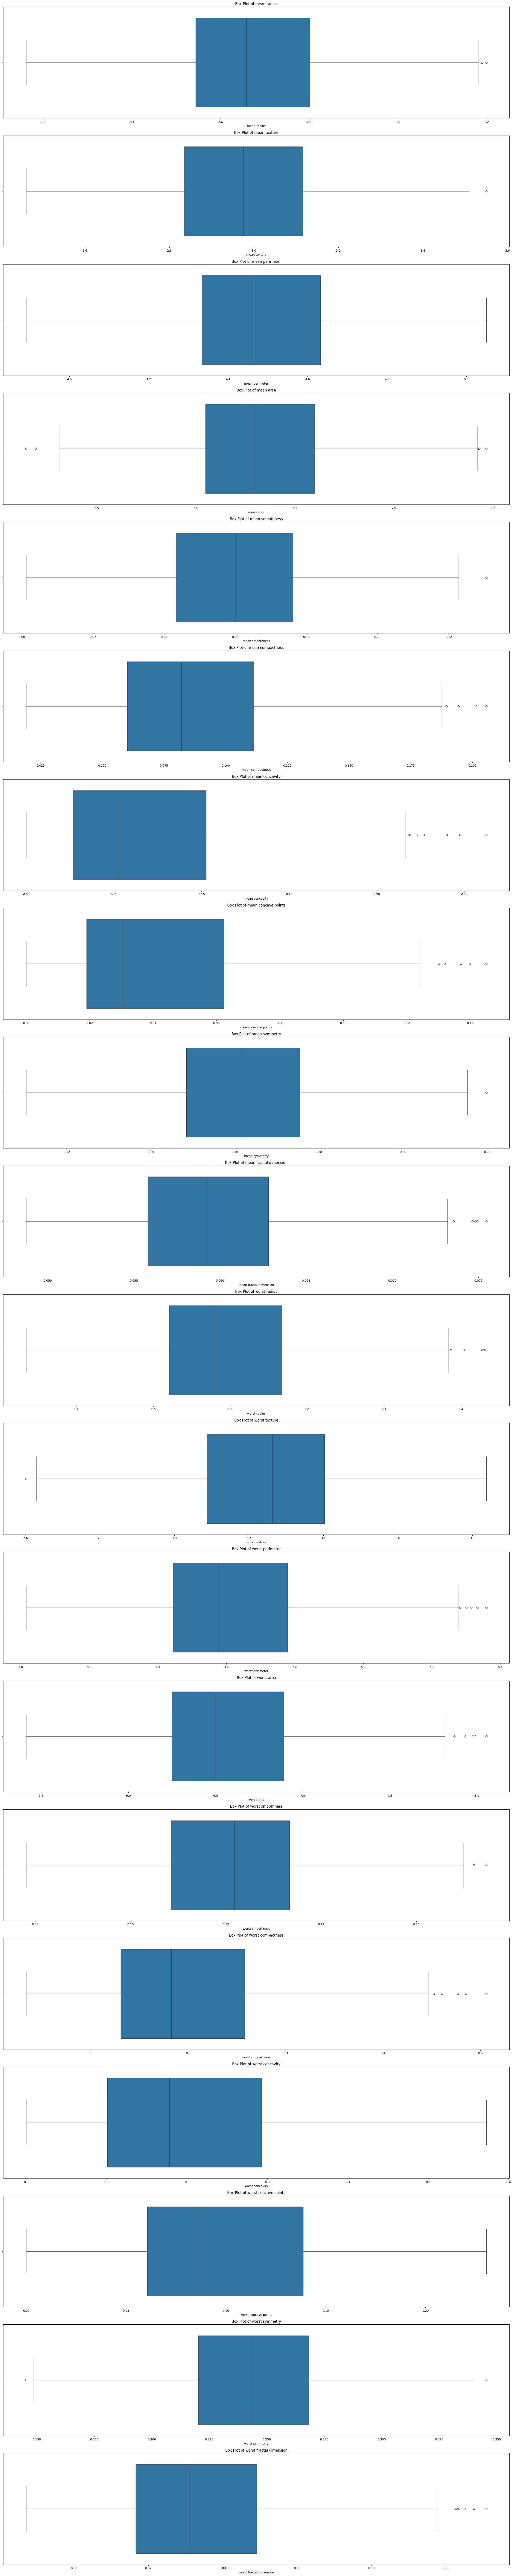

In [ ]:
# Set up the figure and axes with the desired figsize and adjust subplot heights
num_cols = len(cleaned_data.columns) - 1
fig, axes = plt.subplots(num_cols, 1, figsize=(24, 6*num_cols), gridspec_kw={'height_ratios': [2]*num_cols})

# Get all column names except 'benign_0__mal_1'
columns_to_plot = [col for col in cleaned_data.columns if col != 'benign_0__mal_1']

# Iterate over each variable to create the box plot
for i, variable in enumerate(columns_to_plot, 1):
    sb.boxplot(data=cleaned_data[variable], orient='h', ax=axes[i-1])  # Use ax argument to specify subplot
    axes[i-1].set_title(f'Box Plot of {variable}')

plt.tight_layout()
plt.show()

We can see that outliers have been successfully removed from the data set.

## Histogram

We used histograms to verify that we successfully fixed the skewness in our data.

Before cleaning:

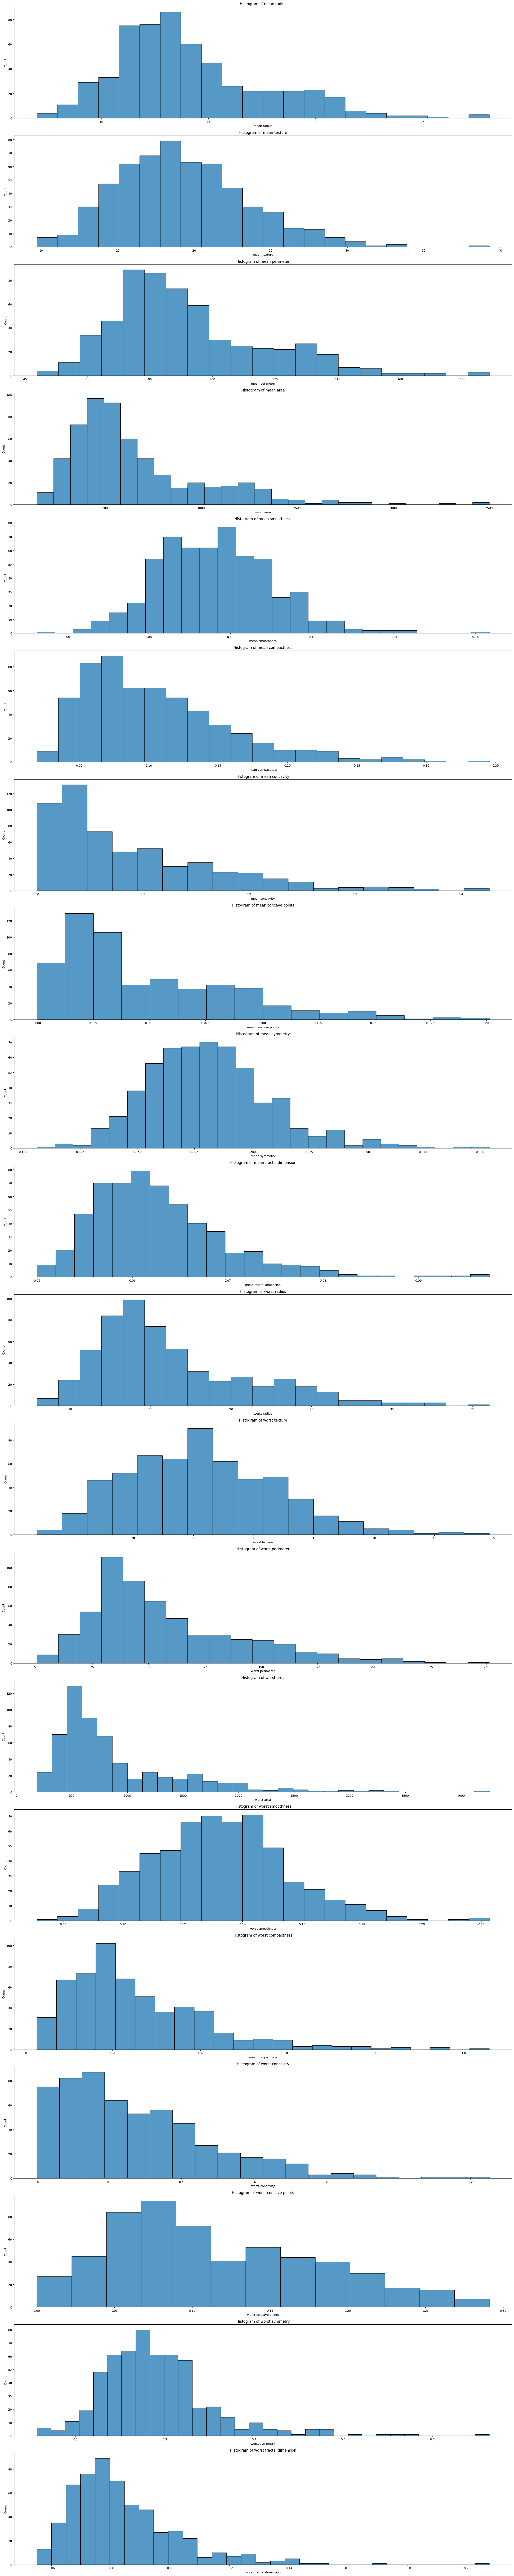

In [ ]:
# Set up the figure and axes with the desired figsize and adjust subplot heights
num_cols = len(pdData.columns) - 1
fig, axes = plt.subplots(num_cols, 1, figsize=(24, 6*num_cols), gridspec_kw={'height_ratios': [2]*num_cols})

# Get all column names except 'benign_0__mal_1'
columns_to_plot = [col for col in pdData.columns if col != 'benign_0__mal_1']

# Iterate over each variable to create the box plot
for i, variable in enumerate(columns_to_plot, 1):
    sb.histplot(data=pdData[variable], ax=axes[i-1])  # Use ax argument to specify subplot
    axes[i-1].set_title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()

After cleaning:

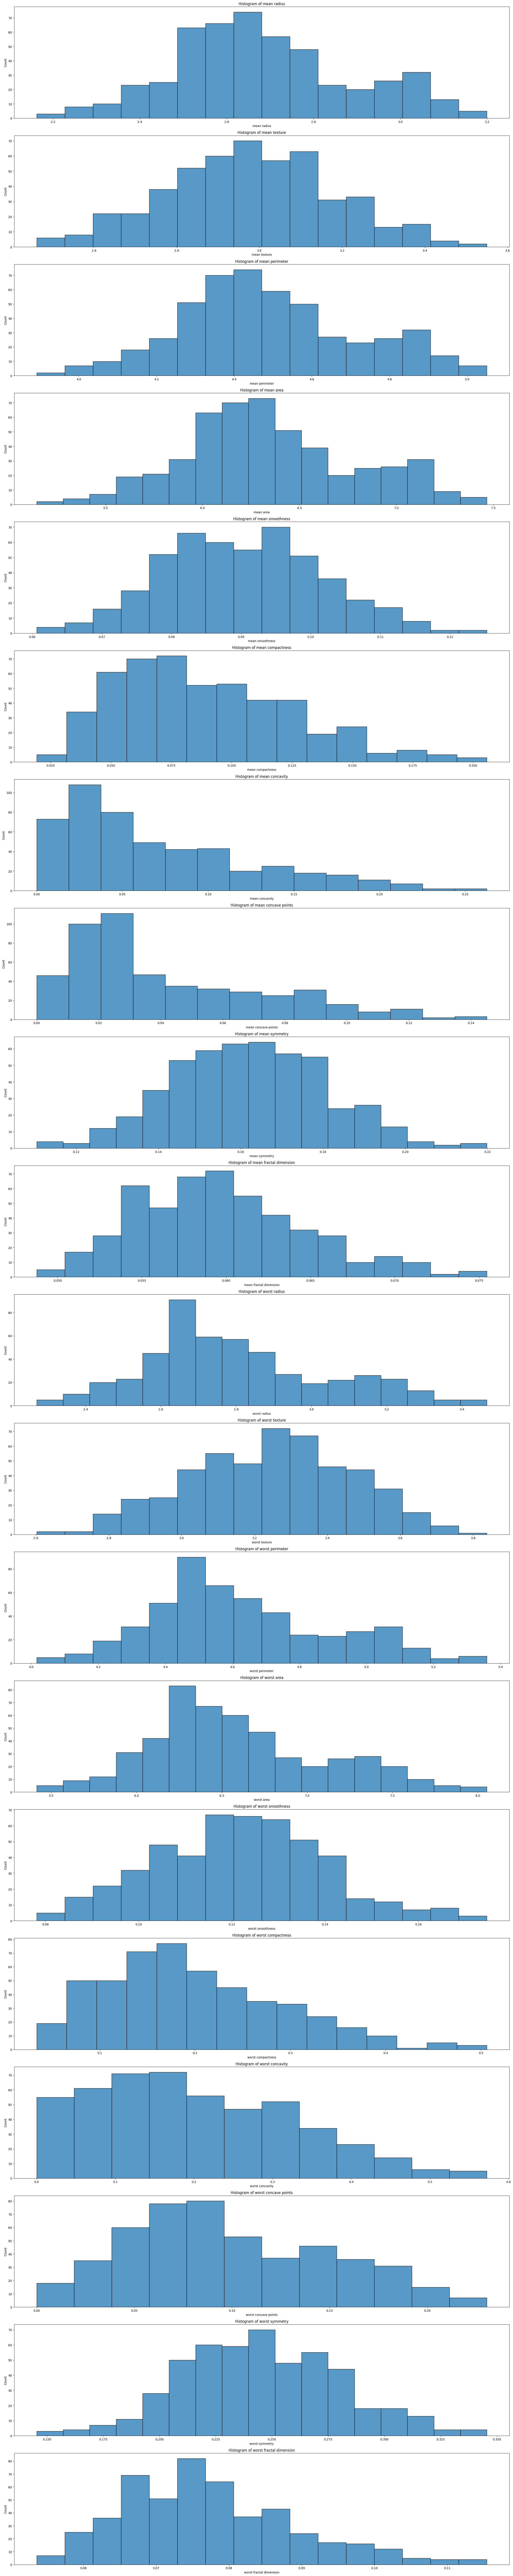

In [ ]:
# Set up the figure and axes with the desired figsize and adjust subplot heights
num_cols = len(cleaned_data.columns) - 1
fig, axes = plt.subplots(num_cols, 1, figsize=(24, 6*num_cols), gridspec_kw={'height_ratios': [2]*num_cols})

# Get all column names except 'benign_0__mal_1'
columns_to_plot = [col for col in cleaned_data.columns if col != 'benign_0__mal_1']

# Iterate over each variable to create the box plot
for i, variable in enumerate(columns_to_plot, 1):
    sb.histplot(data=cleaned_data[variable], ax=axes[i-1])  # Use ax argument to specify subplot
    axes[i-1].set_title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()

We can still see small amounts of skew in some datasets, but overall the skewness has been reduced.

## Heat map

We looked at a heat map to get the correlation values between all columns.

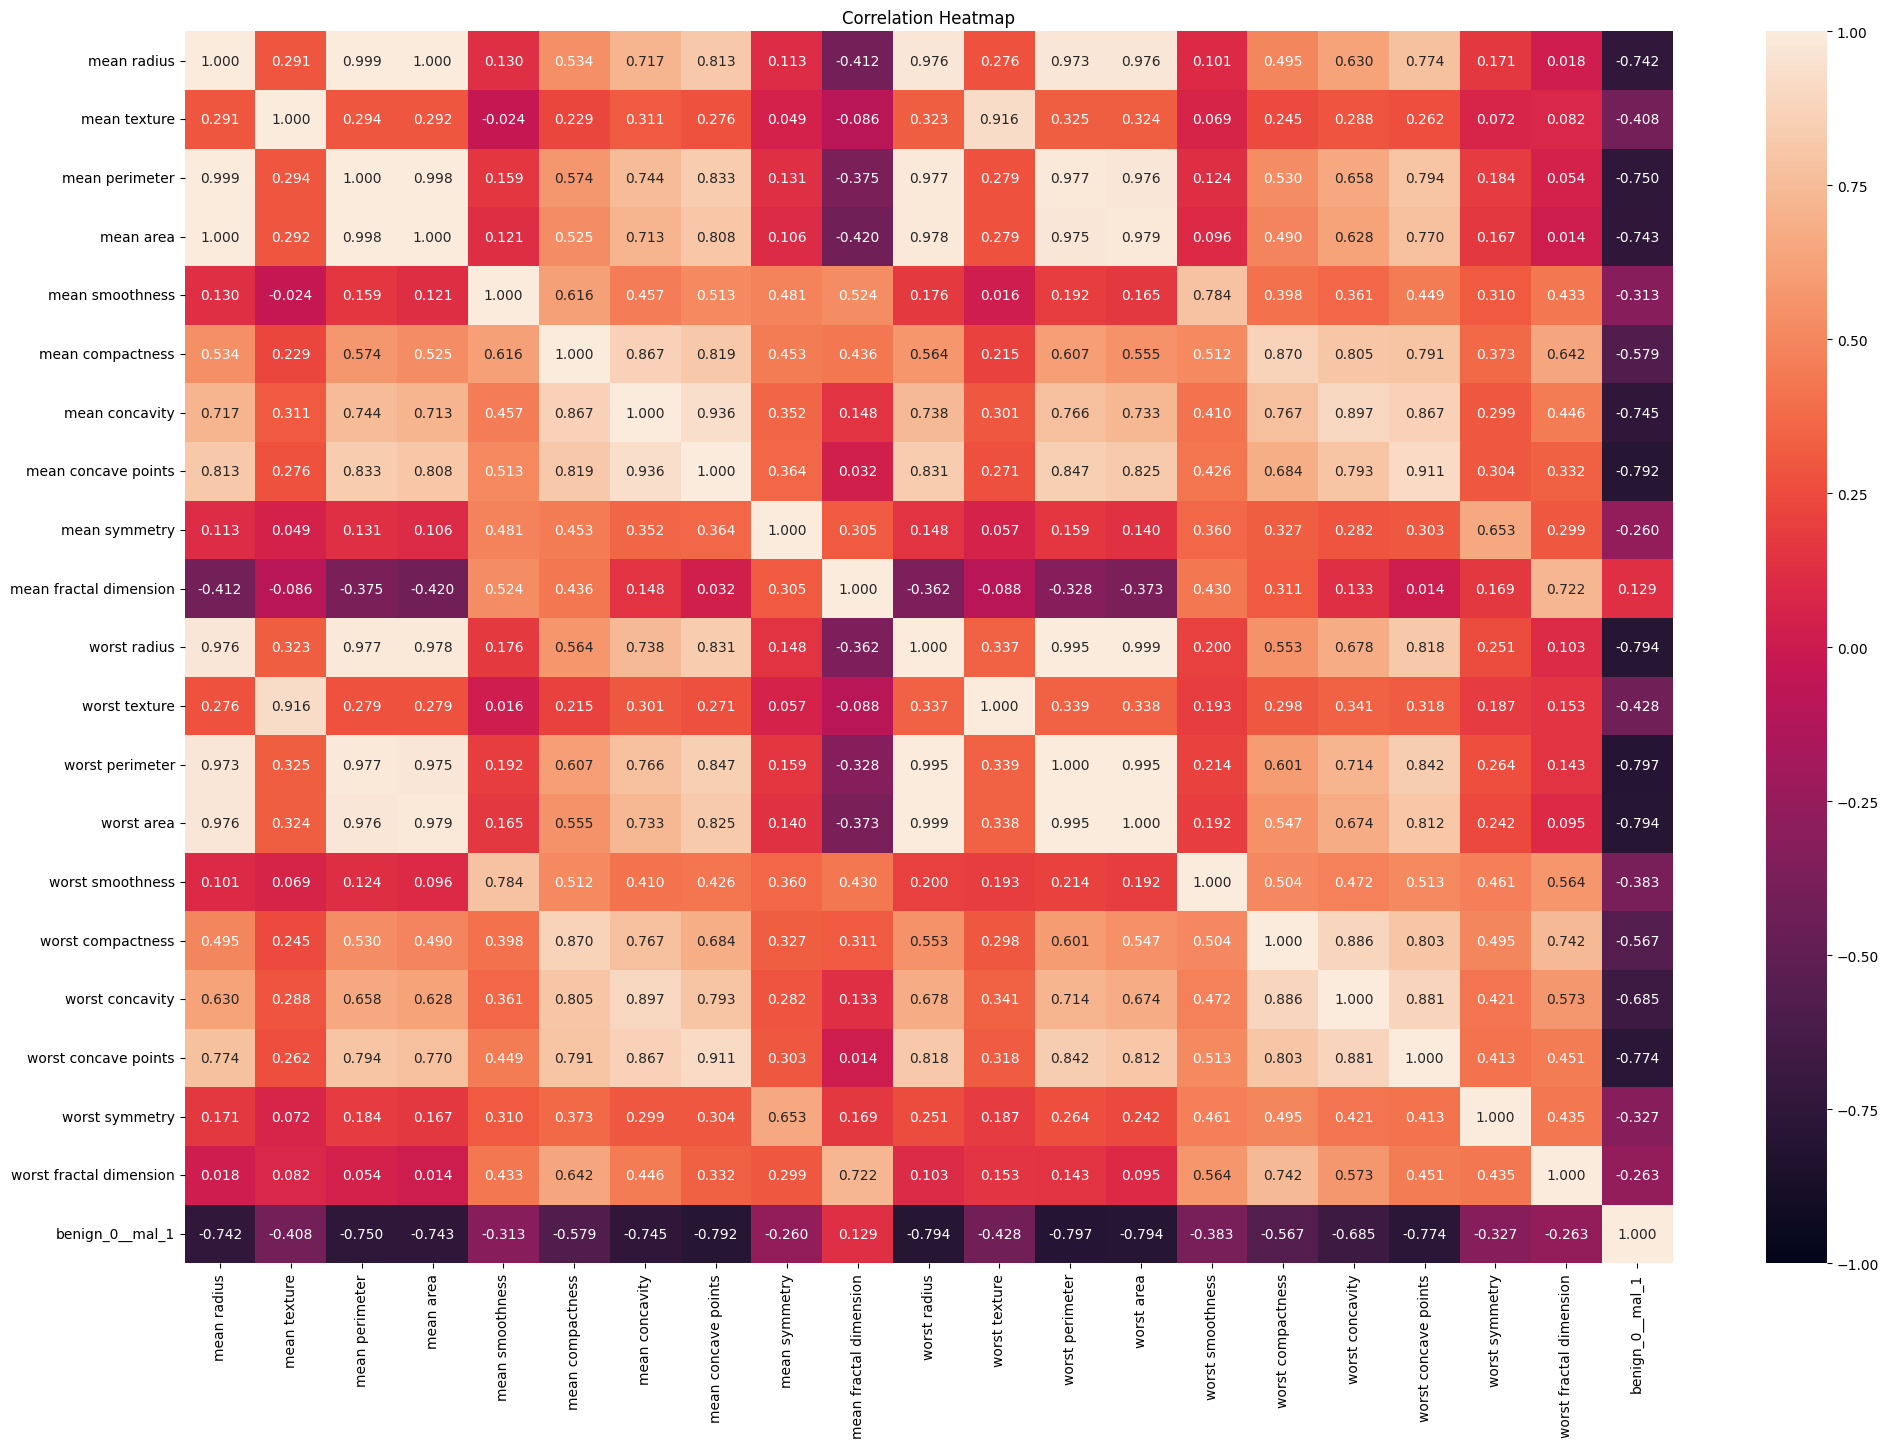

In [ ]:
# Display heatmap
plt.figure(figsize=(24, 16))
sb.heatmap(cleaned_data.corr(), vmin=-1, vmax=1, annot=True, fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

Since we are trying to predict benign_0__mal_1, we can then take a closer look at just the correlation with benign_0__mal_1.

In [ ]:
correlation = cleaned_data.corr()['benign_0__mal_1'][:]
print('Correlation against benign_0__mal_1')
print(correlation)

Correlation against benign_0__mal_1
mean radius               -0.742131
mean texture              -0.408111
mean perimeter            -0.750029
mean area                 -0.742840
mean smoothness           -0.313462
mean compactness          -0.578602
mean concavity            -0.744919
mean concave points       -0.791544
mean symmetry             -0.260430
mean fractal dimension     0.128733
worst radius              -0.794467
worst texture             -0.428500
worst perimeter           -0.797432
worst area                -0.793760
worst smoothness          -0.383350
worst compactness         -0.567138
worst concavity           -0.685426
worst concave points      -0.774248
worst symmetry            -0.327027
worst fractal dimension   -0.262991
benign_0__mal_1            1.000000
Name: benign_0__mal_1, dtype: float64


We decided to narrow down the columns we will work with by only choosing columns with a strong correlation with benign_0__mal_1.

In [ ]:
# Filter correlation values excluding the target column
high_correlation_columns = correlation[(correlation.index != 'benign_0__mal_1') & ((correlation > 0.7) | (correlation < -0.7))]

# Extract column names
best_correlation_columns = high_correlation_columns.index.tolist()

print("Columns with correlation > 0.7 or < -0.7:")
print(best_correlation_columns)

Columns with correlation > 0.7 or < -0.7:
['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


Through correlations we pick out the 9 columns we want to focus on: 'mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points'.

## Swarm Plot

To ensure that the features we picked are suitable, we used swarm plots to check on the overlap between Benign and Malignant box plots. The better features for model prediction should have a low degree of overlap between the Benign and Malignant box plots

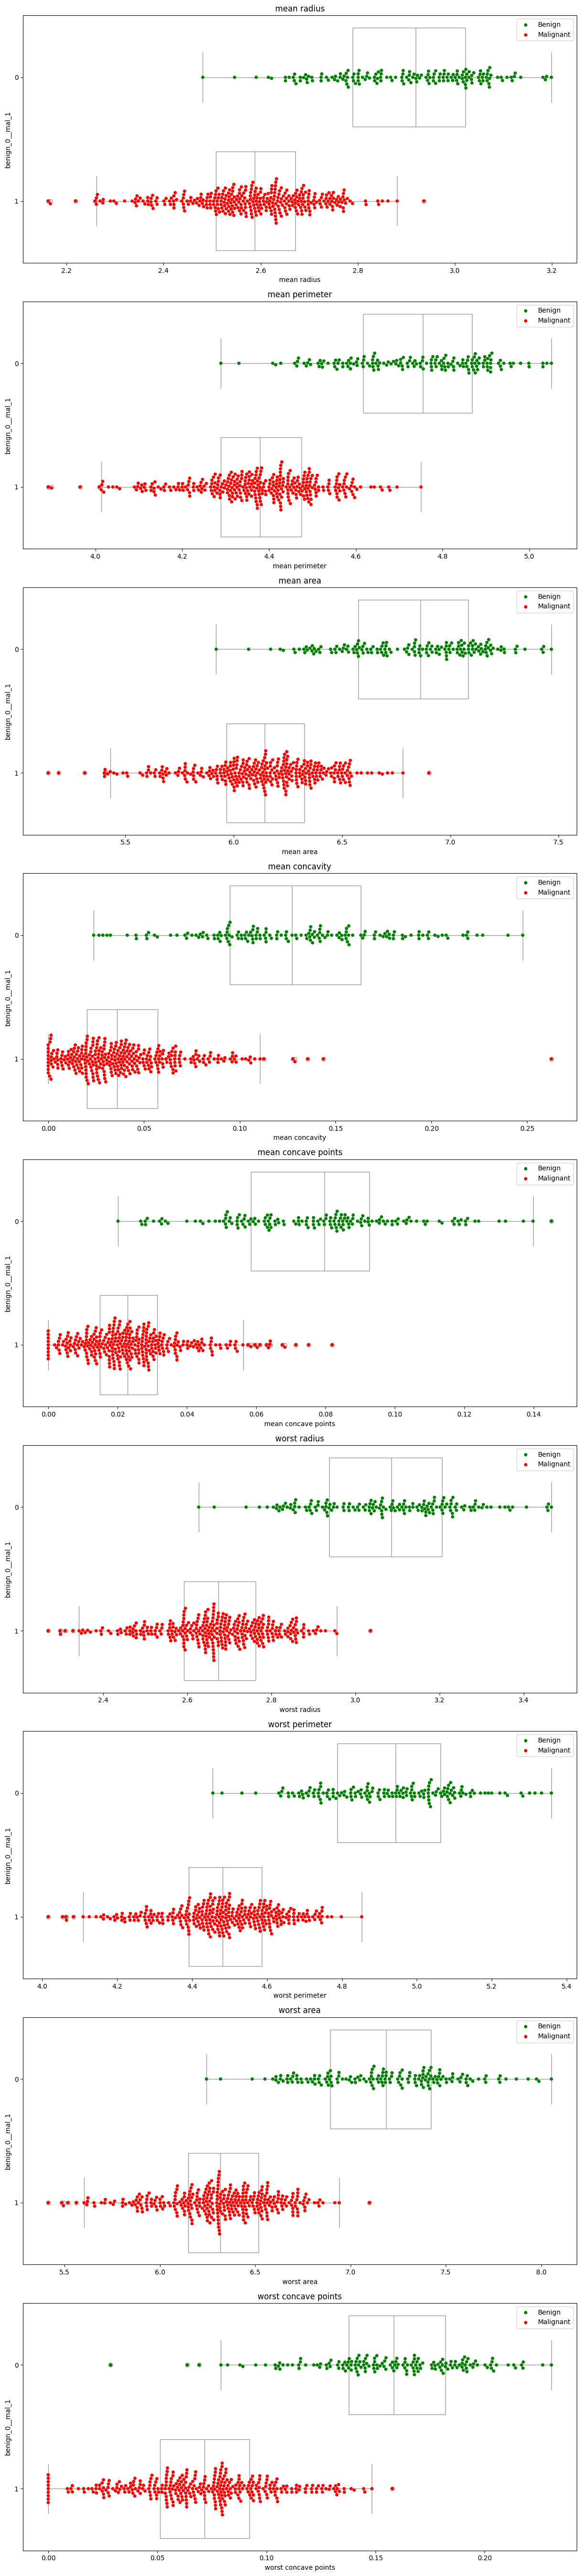

In [ ]:
# Set up the figure and axes
num_cols = len(best_correlation_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(24, 6 * num_cols))

# Iterate over each column in best_correlation_columns
for i, column in enumerate(best_correlation_columns):
    sb.swarmplot(x=column, hue='benign_0__mal_1', hue_order=[0, 1], palette=['green', 'red'], y='benign_0__mal_1', data=cleaned_data, orient="h", ax=axes[i, 0])
    sb.boxplot(x=column, y='benign_0__mal_1', color="white", data=cleaned_data, orient="h", ax=axes[i, 0])
    axes[i, 0].set_title(f'{column}')
    axes[i, 0].legend(labels=['Benign', 'Malignant'])

# Remove empty subplots
for j in range(num_cols):
    axes[j, 1].remove()

plt.tight_layout()
plt.show()

We can see that our selected features do indeed all have low levels of overlap.

Now that we verified that the features we picked out are suitable in use to predict benign_0__mal_1, we can move on to our machine learning techniques.

# Machine Learning Techniques

Now that we have selected the best 9 features and performed data cleaning, let us run the dataset through a series of machine learning models and identify which one leads to the highest prediction accuracy.

In total, we have selected 3 models:
- Logistic Regression
- Random Forest
- Multi-Variate Classification Tree

Rationale for model selections:
- Dataset Types: Our dataset comprised predominantly continuous variables, and our goal was to predict a categorical variable.
- Interpretability: Because the model is meant to be used in a medical context, it is important for the model to be interpretable.
- Performance: The model needed to perform well on metrics which were used for validation in the healthcare industry.

For each of our models we used a classification report to better understand the performance of the model. Classification models provide the following metrics:
- Precision: Ratio of true positive predictions to the total number of positive predictions made by the model. Ideally, precision should be 1.
- Recall: Ratio of true positive predictions to the total number of actual positive instances in the dataset. Ideally, recall should 1.
- F1-score: Harmonic mean of precision and recall, providing a balance between the two metrics. Ideally, F1-score should be 1.
- Support: Number of actual occurrences of each class in the dataset.
- Accuracy: Ratio of correctly classified instances to the total number of instances in the dataset. Ideally, accuracy should be 1.
- Macro Average: Calculates the average of the metrics (precision, recall, F1-score) for each class without considering class imbalance. 
- Weighted Average: Average of the metrics while considering the support for each class. 

We also used looked at classification accuracy, which is the ratio of the number of correct predictions to the total number of input samples.

## Split Dataset into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cleaned_data, test_size = 0.25)

In [ ]:
X_train = pd.DataFrame(train[['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points', 'benign_0__mal_1']]).drop(['benign_0__mal_1'], axis = 1)
y_train = pd.DataFrame(train['benign_0__mal_1'])
X_test = pd.DataFrame(test[['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points', 'benign_0__mal_1']]).drop(['benign_0__mal_1'], axis = 1)
y_test = pd.DataFrame(test['benign_0__mal_1'])
print("Shape of train set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
# shape is row by column

Shape of train set: (372, 9) (372, 1)
Shape of test set: (124, 9) (124, 1)


## Model 1: Logistic Regression

Logistic regression is a statistical method used for binary classification, where the goal is to predict the probability of an input instance belonging to one of two classes.

Why we chose this model:
- Simplicity: Logistic Regression models are easily implementable and highly interpretable.
- Versatility: Able to be used for a wide range of binary classification tasks

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
import warnings

warnings.filterwarnings('ignore')

We initialized a logistic regression model with a regularisation strength parameter (C) set to 0.1 and then fits the model to the training data (X_train) with corresponding labels (y_train).

The regularization strength parameter (C) in logistic regression controls the amount of regularization applied to the model. A smaller value of C indicates stronger regularization, which penalizes large coefficients and helps prevent overfitting by simplifying the model

In [ ]:
log_reg = LogisticRegression(C = 0.1) #Logistic Regression with C value of 0.1
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
# make prediction using the model
log_pred = log_reg.predict(X_test)

In [ ]:
print(f"y_train accuracy: {accuracy_score(y_train, log_reg.predict(X_train))}") # train

log_reg_acc = accuracy_score(y_test, log_pred) # test
print(f"y_test accuracy: {log_reg_acc}")

y_train accuracy: 0.9086021505376344
y_test accuracy: 0.9435483870967742


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.94      0.99      0.96        93

    accuracy                           0.94       124
   macro avg       0.95      0.90      0.92       124
weighted avg       0.94      0.94      0.94       124



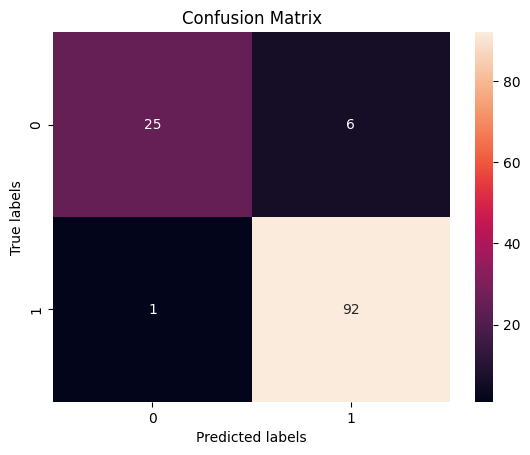

In [ ]:
cf_matrix = confusion_matrix(y_test,log_pred)

print('Classification Report:\n', classification_report(y_test, log_pred))

ax= plt.subplot()
sb.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## Model 2:  Multi-Variate Classification Tree

A graphical representation of decision-making processes or decision rules that can be used to predict outcomes based on input features of variables.

Why we chose this model:
- Automatic Feature Selection: Decision Trees can automatically select important variables from the input data. 
- Interpretability: Decision Trees are highly interpretable, giving them an advantage in the healthcare setting.
- Ease of use: Decision Trees are easy to implement, and do not require complex calculations or intensive computational resources.

We decided to explore both a model with Tree Height 2 and a model with Tree Height 4, to determine which one leads to a higher classification accuracy.

### Tree Height = 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model (Train Dataset)")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model (Test Dataset)")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

Goodness of Fit of Model (Train Dataset)
Classification Accuracy 	: 0.9354838709677419

Goodness of Fit of Model (Test Dataset)
Classification Accuracy 	: 0.9032258064516129


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        31
           1       0.97      0.90      0.93        93

    accuracy                           0.90       124
   macro avg       0.86      0.90      0.88       124
weighted avg       0.91      0.90      0.91       124



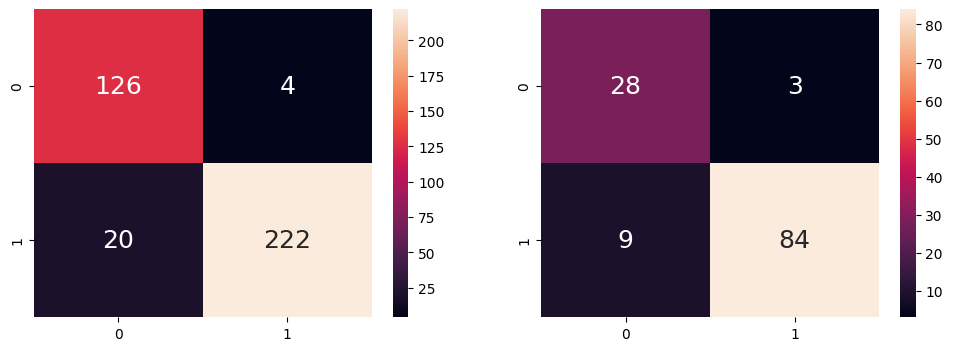

In [ ]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print('Classification Report:\n', classification_report(y_test, y_test_pred))

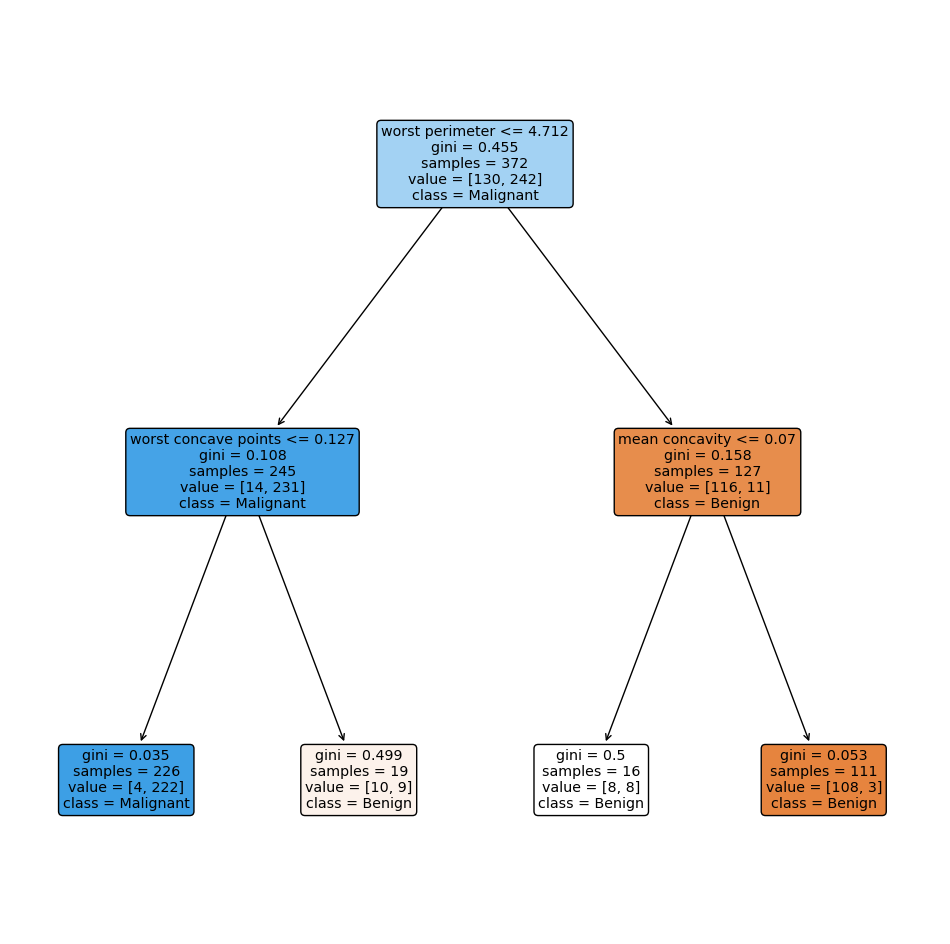

In [ ]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Benign", "Malignant"])

plt.show()

### Tree Height = 4

In [ ]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model (Train Dataset)")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model (Test Dataset)")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model (Train Dataset)
Classification Accuracy 	: 0.9838709677419355

Goodness of Fit of Model (Test Dataset)
Classification Accuracy 	: 0.9193548387096774



Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.96      0.94      0.95        93

    accuracy                           0.92       124
   macro avg       0.89      0.90      0.89       124
weighted avg       0.92      0.92      0.92       124



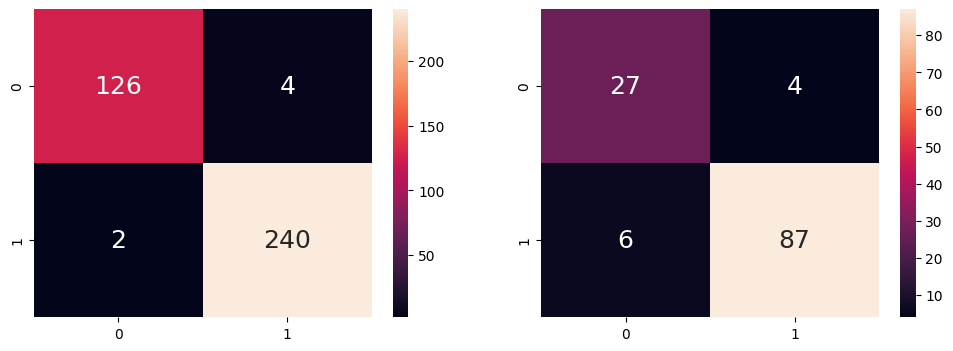

In [ ]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print('Classification Report:\n', classification_report(y_test, y_test_pred))

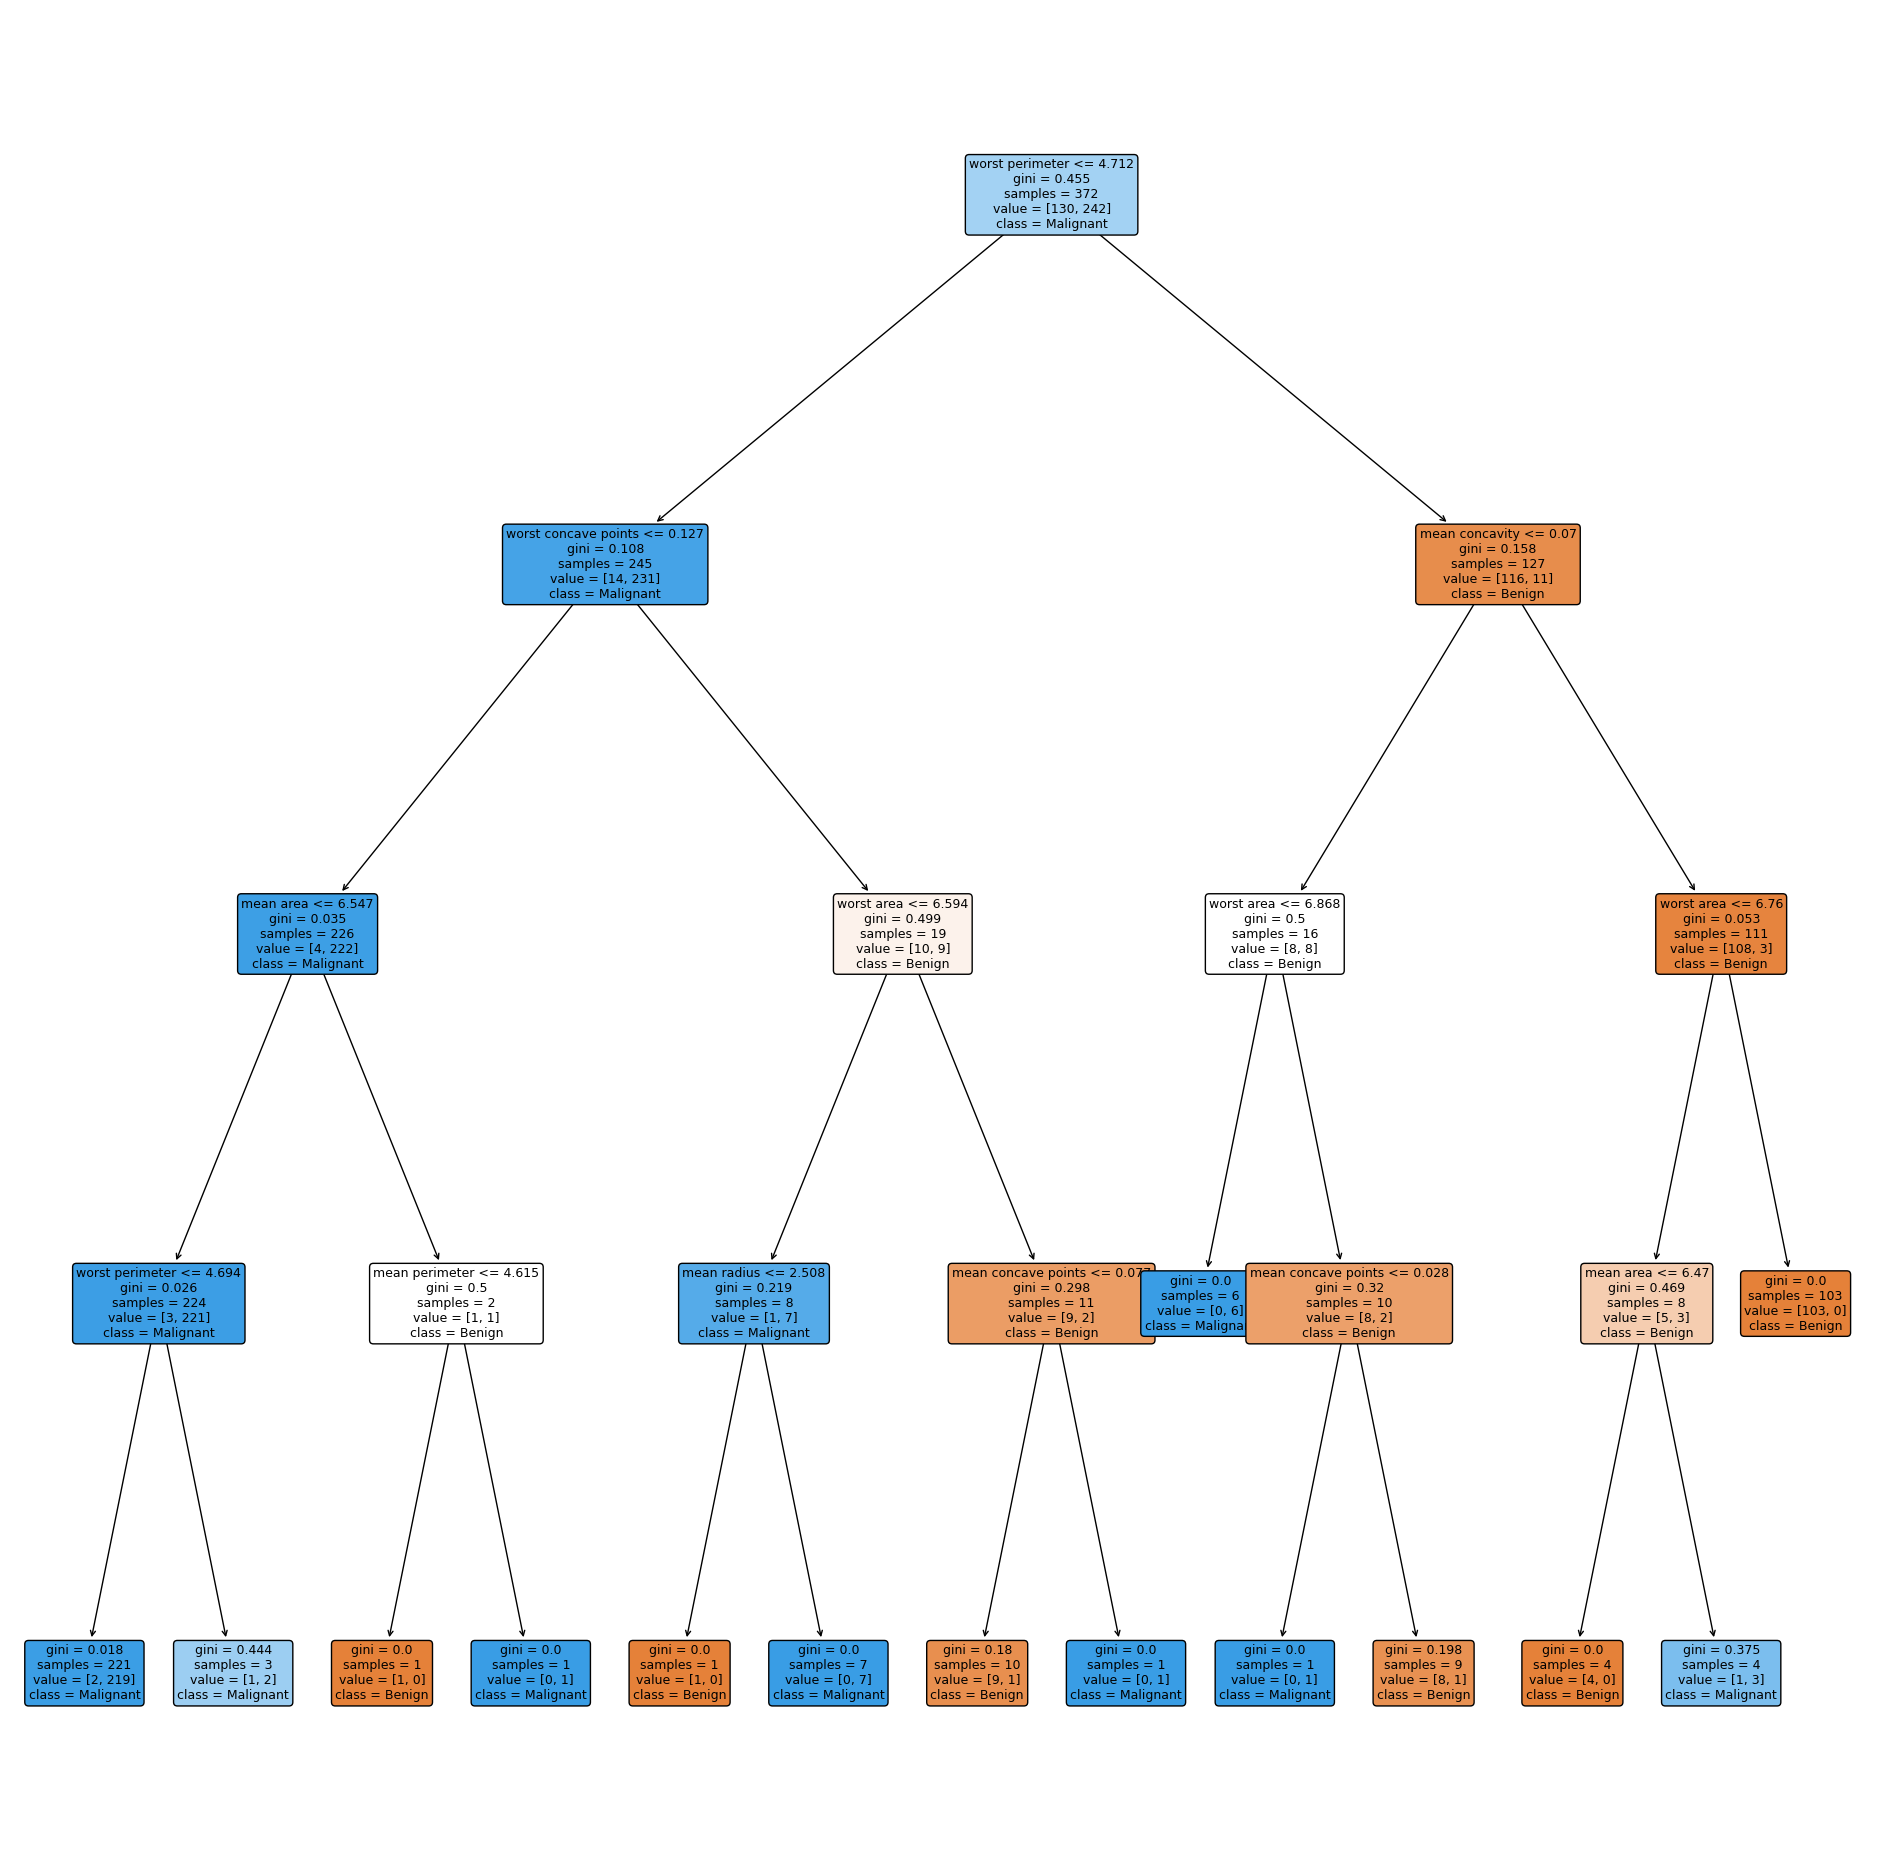

In [ ]:
f = plt.figure(figsize=(24, 24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Benign", "Malignant"],
          fontsize=9)

plt.show()  # Display the tree plot

## Model 3: Random Forest

An ensemble learning technique which combines multiple decision trees to create a more accurate and robust model.

Why we chose this model:
- Improved Accuracy compared to a single decision tree.
- Resilience to Overfitting: Random Feature selection of 400-1200 decision trees make Random Forest less prone to overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Instantiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

Classification Accuracy: 0.9516129032258065

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.95      0.99      0.97        93

    accuracy                           0.95       124
   macro avg       0.96      0.91      0.93       124
weighted avg       0.95      0.95      0.95       124



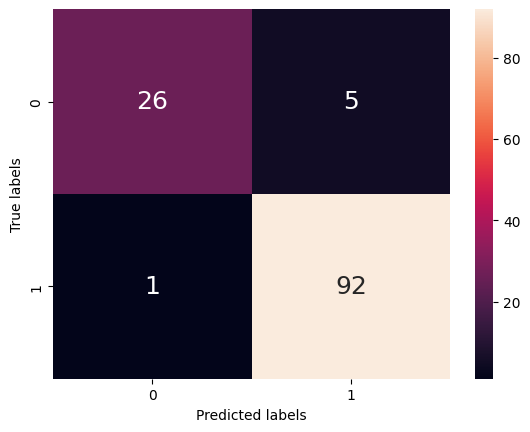

In [ ]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print()
print('Classification Report:\n', classification_report(y_test, y_pred))

ax = plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=ax)  

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

plt.show()

# Data-driven Insights

The 4 metrics we have selected to analyse the models above are classification accuracy, area under Receiver Operating Characteristic curve, f1-score, and false negative rates. 

This diverse set of metrics directly maps to our key project requirements: minimizing missed cancers (FNR), maintaining overall reliability (classification accuracy), ensuring a good balance between correctly identifying both positive and negative cases (f1-score), and offering flexibility in setting decision thresholds (AUC ROC).

## Classification Accuracy

As mentioned above, we have included classification accuracy in our classification report, as it is the simplest measure of how well the model is performing. Here is a quick overview of the classification accuracy of all 3 models at a glance.

In [ ]:
dectree2 = DecisionTreeClassifier(max_depth=2)
dectree4 = DecisionTreeClassifier(max_depth=4)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
logreg = LogisticRegression(C=0.1)

# Fit models
dectree2.fit(X_train, y_train)
dectree4.fit(X_train, y_train)
rfc.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_dectree2 = dectree2.predict(X_test)
y_pred_dectree4 = dectree4.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy
accuracy_dectree2 = accuracy_score(y_test, y_pred_dectree2)
accuracy_dectree4 = accuracy_score(y_test, y_pred_dectree4)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Print accuracy
print("Accuracy of Decision Tree (Depth 2):", accuracy_dectree2)
print("Accuracy of Decision Tree (Depth 4):", accuracy_dectree4)
print("Accuracy of Random Forest Classifier:", accuracy_rfc)
print("Accuracy of Logistic Regression:", accuracy_logreg)


Accuracy of Decision Tree (Depth 2): 0.9032258064516129
Accuracy of Decision Tree (Depth 4): 0.9274193548387096
Accuracy of Random Forest Classifier: 0.9516129032258065
Accuracy of Logistic Regression: 0.9435483870967742


However, this only gives us a general idea of how often the model is correct without providing any insights on the details of the minority class. For instance, a model may achieve 90% accuracy, but this is not a good score as if 90 samples out of 100 belongs to one class and this accuracy can be achieved easily by always predicting most common class. Hence, to substantiate our analysis, we have also selected the other 3 metrics.

## Area under ROC Curve

The ROC curve is a graphical representation of the true positive rate against the false positive rate for different threshold values. 

The AUC-ROC measures the area under the ROC curve. It provides a single scalar value that represents the overall performance of the classifier across all possible threshold values. The AUC-ROC value ranges from 0 to 1, where the higher the score the better.

### Plotting of ROC Curve

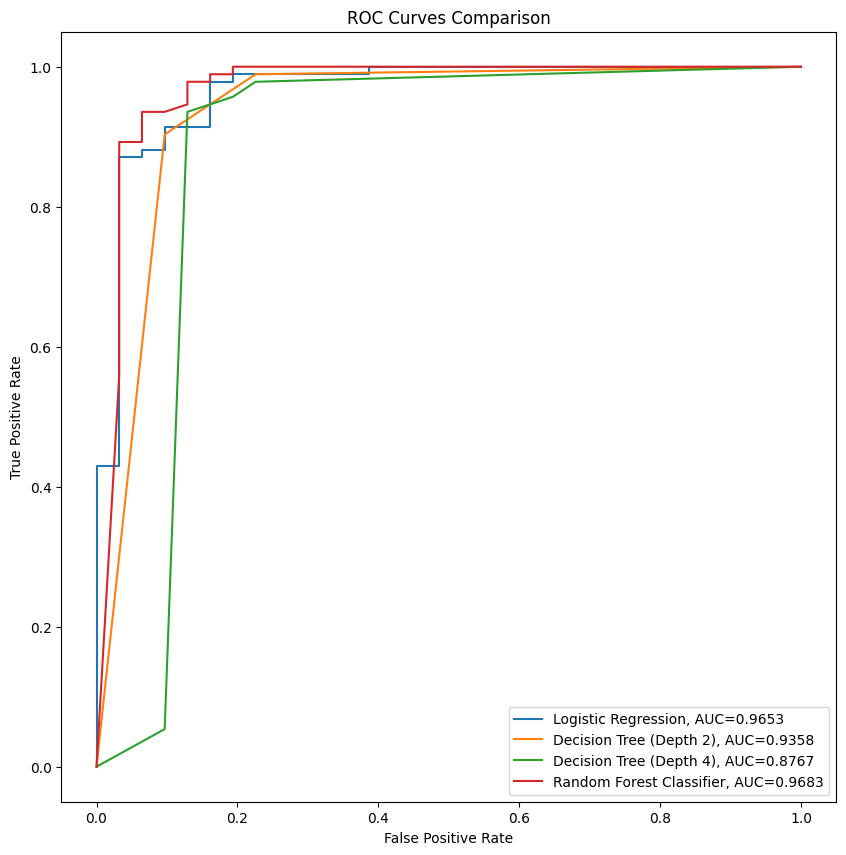

In [ ]:
import sklearn.metrics as metrics

# Set up plotting area
plt.figure(figsize=(10, 10)).clf()

# Helper function to fit models and plot ROC
def fit_and_plot(model, label, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr, tpr, label=f"{label}, AUC={auc}")

# Model 1 - Logistic Regression
fit_and_plot(LogisticRegression(C=0.1), "Logistic Regression", X_train, y_train, X_test, y_test)

# Model 2 - Decision Tree (Depth 2)
fit_and_plot(DecisionTreeClassifier(max_depth=2), "Decision Tree (Depth 2)", X_train, y_train, X_test, y_test)

# Model 2 - Decision Tree (Depth 4)
fit_and_plot(DecisionTreeClassifier(max_depth=4), "Decision Tree (Depth 4)", X_train, y_train, X_test, y_test)

# Model 3 - Random Forest Classifier
fit_and_plot(RandomForestClassifier(n_estimators=100, random_state=42),
             "Random Forest Classifier", X_train, y_train, X_test, y_test)


# Add legend and axis labels
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.show()


## F1-Scores

The F1-score has also been previously mentioned in our classification report. Here are the values of the F1-Score for all 3 models for easier reference. The larger the F1-Score, the better the precision and recall, hence a better model performance.

In [ ]:
import sklearn.metrics as metrics

# Set up plotting area
plt.figure(figsize=(10, 10)).clf()

# Helper function to fit models and calculate F1-score
def fit_and_calc_f1(model, label, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predictions for F1-score are direct classes
    f1 = round(metrics.f1_score(y_test, y_pred), 4) 
    print(f"{label}: F1-Score = {f1}")  # Print the score

# Model 1 - Logistic Regression
fit_and_calc_f1(LogisticRegression(C=0.1), "Logistic Regression", X_train, y_train, X_test, y_test)

# Model 2 - Decision Tree (Depth 2)
fit_and_calc_f1(DecisionTreeClassifier(max_depth=2), "Decision Tree (Depth 2)", X_train, y_train, X_test, y_test)

# Model 2 - Decision Tree (Depth 4)
fit_and_calc_f1(DecisionTreeClassifier(max_depth=4), "Decision Tree (Depth 4)", X_train, y_train, X_test, y_test)

# Model 3 - Random Forest Classifier
fit_and_calc_f1(RandomForestClassifier(n_estimators=100, random_state=42),
             "Random Forest Classifier", X_train, y_train, X_test, y_test)


Logistic Regression: F1-Score = 0.9634
Decision Tree (Depth 2): F1-Score = 0.9333
Decision Tree (Depth 4): F1-Score = 0.9519
Random Forest Classifier: F1-Score = 0.9684


<Figure size 1000x1000 with 0 Axes>

As seen from above, the highest F1-score means a better model performance. Just from F1-Score alone, **Random Forest Classifier** is the best model with a F1-Score of 0.9542.

## False Negative Rates

The False Negative Rate (FNR) is the most important concern because it represents the cases where our model wrongly labels a patient with cancer as healthy. This type of error is incredibly dangerous as it  delays vital treatment, allowing the cancer to worsen.  Early detection and intervention are absolutely critical for the best possible patient outcomes. Furthermore,  a false negative result can provide false reassurance to the patient, potentially leading them to ignore symptoms and delay seeking further medical attention.

The consequences of missing a breast cancer diagnosis far outweigh the inconvenience of additional testing for a patient who is actually healthy (False Positive Rates).

Here are the False Negative Rates (FNR) at a glance. _**FNR = False Negatives/(False Negatives + True Positives)**_

`Model 1: Logistic Regression` : 1/(1+73) = 0.01351351351
`Model 2: MVC Tree (Tree Height = 2)` : 1/(1+73) = 0.01351351351
`Model 2: MVC Tree (Tree Height = 4)` : 0/(0+73) = 0
`Model 3: Random Forest` : 1/1+73 = 0.01351351351






From this metric, the MVC Tree with a height of 4 performed the best. However, the false negative rates are low for all the models, hence, this indicates that our models are generally effective in minimising missed cancer diagnoses.

## Results

**Table of results**

In [ ]:
metrics = ["Classifier", "Accuracy", "AUC", "F1-Score", "FNR"]
decision_tree_2 = [0.9113, 0.8982, 0.9299, 0.01351351351] 
decision_tree_4 = [0.9032, 0.922, 0.9193, 0]
logistic_regression = [0.8790, 0.9808, 0.9068, 0.01351351351]
random_forest = [0.9435, 0.9915, 0.9542, 0.01351351351]

#Print the table
table = "{:30s}{:15s}{:15s}{:15s}{:15s}\n".format(*metrics)
table += "{:30s}{:<15.4f}{:<15.4f}{:<15.4f}{:<15.4f}\n".format("Decision Tree (depth=2)", *decision_tree_2)
table += "{:30s}{:<15.4f}{:<15.4f}{:<15.4f}{:<15.4f}\n".format("Decision Tree (depth=4)", *decision_tree_4)
table += "{:30s}{:<15.4f}{:<15.4f}{:<15.4f}{:<15.4f}\n".format("Logistic Regression", *logistic_regression)
table += "{:30s}{:<15.4f}{:<15.4f}{:<15.4f}{:<15.4f}\n".format("Random Forest", *random_forest)

print(table)

Classifier                    Accuracy       AUC            F1-Score       FNR            
Decision Tree (depth=2)       0.9113         0.8982         0.9299         0.0135         
Decision Tree (depth=4)       0.9032         0.9220         0.9193         0.0000         
Logistic Regression           0.8790         0.9808         0.9068         0.0135         
Random Forest                 0.9435         0.9915         0.9542         0.0135         



**Graph comparing all 3 models**

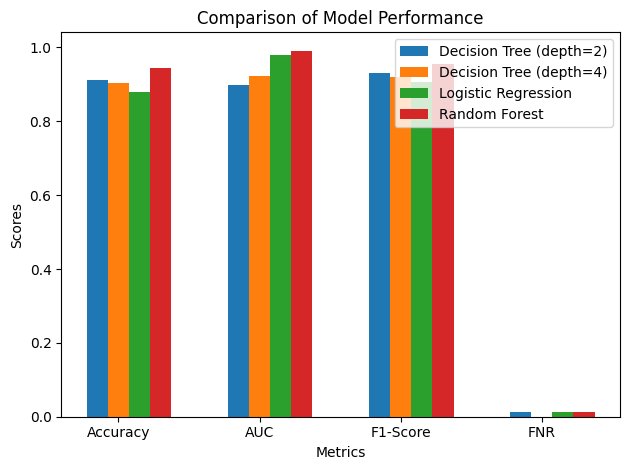

In [ ]:
import matplotlib.pyplot as plt

# Define data including FNR
metrics = ["Classifier", "Accuracy", "AUC", "F1-Score", "FNR"]
decision_tree_2 = ["Decision Tree (depth=2)", 0.9113, 0.8982, 0.9299, 0.0135]
decision_tree_4 = ["Decision Tree (depth=4)", 0.9032, 0.922, 0.9193, 0.0]
logistic_regression = ["Logistic Regression", 0.8790, 0.9808, 0.9068, 0.0135]
random_forest = ["Random Forest", 0.9435, 0.9915, 0.9542, 0.0135]

# Extract scores from lists
dt2_scores = decision_tree_2[1:]
dt4_scores = decision_tree_4[1:]
lr_scores = logistic_regression[1:]
rf_scores = random_forest[1:]

# Set bar positions in groups
n_groups = len(metrics) - 1  # We include FNR this time
positions = list(range(n_groups))
bar_width = 0.15

# Create bars for each model
plt.bar(positions, 
        dt2_scores, 
        bar_width, 
        label='Decision Tree (depth=2)',
        )
plt.bar([p + bar_width for p in positions], 
        dt4_scores, 
        bar_width, 
        label='Decision Tree (depth=4)',
        )
plt.bar([p + bar_width * 2 for p in positions], 
        lr_scores, 
        bar_width, 
        label='Logistic Regression',
        )
plt.bar([p + bar_width * 3 for p in positions], 
        rf_scores, 
        bar_width, 
        label='Random Forest',
        )

# Add labels and titles
plt.xticks([p + bar_width for p in positions], metrics[1:])  # Adjust position for labels
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance")

# Add legend and adjust the plot
plt.legend()
plt.tight_layout()  # Adjust the layout to fit everything nicely

# Display the plot
plt.show()


# Conclusion

## Best Model: RANDOM FOREST CLASSIFIER

As seen in the table and graphs, we see that the **Random Forest Classifier** has the highest classification accuracy, Area Under Curve and F1-Score compared to the other models. Hence, Random Forest Classifier is the best model in predicting breast cancer.

This could potentially be due to the fact that Random Forest Classifier (RFC) uses random sampling, ensuring that each tree is different and hence reduces the correlations between the trees. RFC is better at managing bias-variance tradeoff than decision tree, hence better generalisation for RFC.

## Recommendations

We see 2 main aspects that can potentially be improved upon in future iterations of this project. 

Dataset Selection
- The models can be trained on larger and more extensive datasets, to improve the robustness of the models.

Hyperparameter Tuning
- Hyperparameter tuning refers to the process of selecting the best set of hyperparameters for a machine learning algorithm. 
- Hyperparameters of the various models can also be automatically tuned during training using informed search strategies to reduce training time.

## Final Remarks

Ultimately, our model is not aimed to replace the work of radiologists and doctors, but rather to aid in the diagnosis of breast cancer.

The aim of our model is to augment the diagnosis and to provide a second point of confirmation. A trained medical professional is still needed to confirm if the results are accurate and consistent with their domain knowledge. However, we have shown that breast cancer diagnosis can be a data-driven problem, and that technology and machine learning can be used to aid in the medical field.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f1043b1-5684-4bd8-b19e-23e98d64000b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>